<a href="https://colab.research.google.com/github/bhavay-10112002/EDA-ASSIGNMENT/blob/main/EDA21BDS0342.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("PhDPublications.csv")
data

,rownames,articles,gender,married,kids,prestige,mentor
0,1,0,male,yes,0,2.52,7
1,2,0,female,no,0,2.05,6
2,3,0,female,no,0,3.75,6
3,4,0,male,yes,1,1.18,3
4,5,0,female,no,0,3.75,26
...,...,...,...,...,...,...,...
910,911,11,male,yes,2,2.86,7
911,912,12,male,yes,1,4.29,35
912,913,12,male,yes,1,1.86,5
913,914,16,male,yes,0,1.74,21


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('PhDPublications.csv')

# Check missing values
print("\n=== Missing Values ===")
print(data.isnull().sum())

# Drop columns with more than 15% missing values
threshold = 0.15 * len(data)
data_cleaned = data.loc[:, data.isnull().sum() < threshold]

# Separate numeric and non-numeric columns
numeric_cols = data_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = data_cleaned.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with the mean
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

print("\n=== Cleaned Data (Preview) ===")
print(data_cleaned.head())

# ==========================
# Visualization Techniques
# ==========================

# Plot histogram for 'CIK' column (a numeric column)
if 'CIK' in numeric_cols:
    sns.histplot(data_cleaned['CIK'], kde=True)
    plt.title('Histogram of CIK')
    plt.xlabel('CIK')
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot for 'CIK' vs 'Founded' (both numeric columns)
if 'CIK' in numeric_cols and 'Founded' in numeric_cols:
    plt.scatter(data_cleaned['CIK'], data_cleaned['Founded'])
    plt.title('CIK vs Founded')
    plt.xlabel('CIK')
    plt.ylabel('Founded')
    plt.show()


=== Missing Values ===
rownames    0
articles    0
gender      0
married     0
kids        0
prestige    0
mentor      0
dtype: int64

=== Cleaned Data (Preview) ===
   rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  915 non-null    int64  
 1   articles  915 non-null    int64  
 2   gender    915 non-null    object 
 3   married   915 non-null    object 
 4   kids      915 non-null    int64  
 5   prestige  915 non-null    float64
 6   mentor    915 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 50.2+ KB

Preview of the dataset:
   rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26

Missing Values Count:
rownames    0
articles    0
gender      0

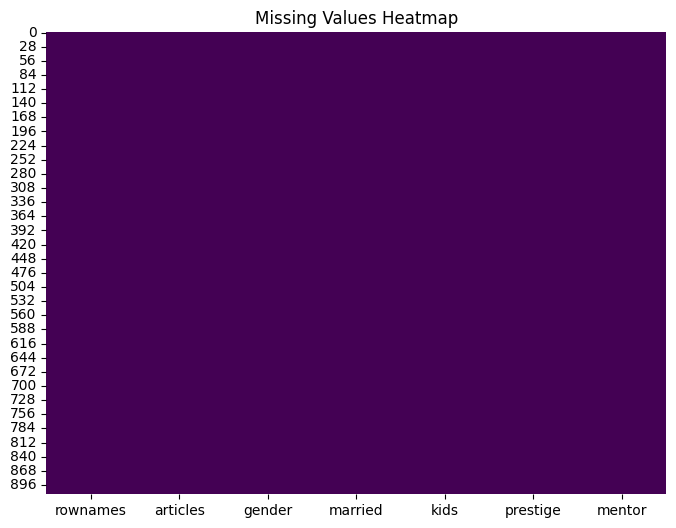

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/mnt/data/PhDPublications.csv'
data = pd.read_csv('PhDPublications.csv')

# Display basic information about the dataset
print("Dataset Information:")
data.info()

# Display the first few rows
print("\nPreview of the dataset:")
print(data.head())

# Checking for missing values
print("\nMissing Values Count:")
print(data.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Identifying data types
print("\nData Types in the Dataset:")
print(data.dtypes)

# Detecting categorical and numerical data
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:", list(categorical_columns))
print("Numerical Columns:", list(numerical_columns))

# Visualizing missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



Number of Duplicate Rows: 0
Shape after removing duplicates: (915, 7)

Preview after replacing -999 with NaN:
   rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26

Binning Example:
  Binned
0    Low
1    Low
2    Low
3    Low
4    Low

Handling Missing Data:
Shape after dropping rows with missing values: (915, 7)

Preview after filling missing values with mean:
   rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4     

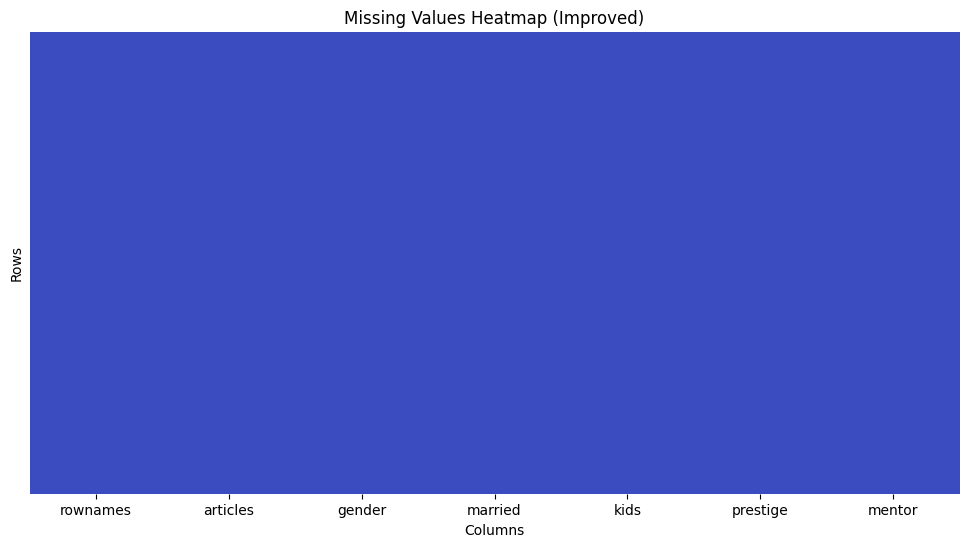

In [10]:
#DATA TRANSFORMATION (MODULE 2)
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/mnt/data/PhDPublications.csv'
data = pd.read_csv('PhDPublications.csv')

# Data Deduplication
print("\nNumber of Duplicate Rows:", data.duplicated().sum())
data_deduplicated = data.drop_duplicates()
print("Shape after removing duplicates:", data_deduplicated.shape)

# Replacing Values (e.g., replace placeholder values like -999 with NaN)
data_replaced = data.replace(-999, np.nan)
print("\nPreview after replacing -999 with NaN:")
print(data_replaced.head())

# Discretization and Binning
# Example: Bin a numerical column into categories
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

if not numerical_columns.empty:
    column_to_bin = numerical_columns[0]  # Choose a numerical column
    data_binned = data.copy()
    bins = [0, 10, 20, 50, 100]  # Define bin edges
    labels = ['Low', 'Medium', 'High', 'Very High']  # Define labels
    data_binned['Binned'] = pd.cut(data_binned[column_to_bin], bins=bins, labels=labels)
    print("\nBinning Example:")
    print(data_binned[['Binned']].head())

# Handling Missing Data - Traditional Methods
print("\nHandling Missing Data:")
# 1. Drop rows with missing values
data_dropped = data.dropna()
print("Shape after dropping rows with missing values:", data_dropped.shape)

# 2. Fill missing values with mean (for numerical columns)
data_filled_mean = data.copy()
for col in numerical_columns:
    data_filled_mean[col] = data_filled_mean[col].fillna(data_filled_mean[col].mean())
print("\nPreview after filling missing values with mean:")
print(data_filled_mean.head())

# Handling Missing Data - Maximum Likelihood Estimation (MLE)
# Using Iterative Imputer (requires sklearn)
iterative_imputer = IterativeImputer(random_state=42)
data_mle = data.copy()
numerical_data = data_mle[numerical_columns]  # Only impute numerical data
imputed_data = iterative_imputer.fit_transform(numerical_data)
data_mle[numerical_columns] = imputed_data

print("\nPreview after applying MLE for missing data:")
print(data_mle.head())



# Visualizing Missing Values - Improved Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.title("Missing Values Heatmap (Improved)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()





Univariate Analysis - Summary Statistics:

Column: rownames
count    915.000000
mean     458.000000
std      264.282046
min        1.000000
25%      229.500000
50%      458.000000
75%      686.500000
max      915.000000
Name: rownames, dtype: float64

Column: articles
count    915.000000
mean       1.692896
std        1.926069
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       19.000000
Name: articles, dtype: float64

Column: kids
count    915.000000
mean       0.495082
std        0.764880
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: kids, dtype: float64

Column: prestige
count    915.000000
mean       3.103109
std        0.984249
min        0.755000
25%        2.260000
50%        3.150000
75%        3.920000
max        4.620000
Name: prestige, dtype: float64

Column: mentor
count    915.000000
mean       8.767213
std        9.483916
min        0.000000
25%        3.000000
50%        6.

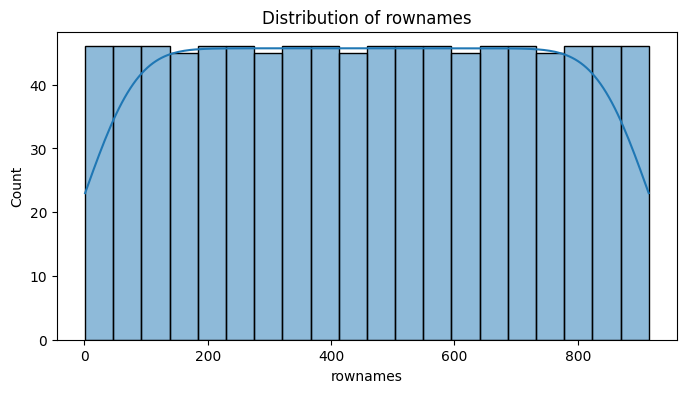

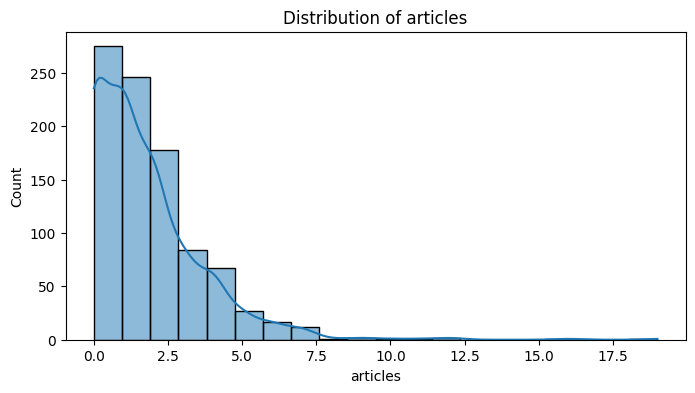

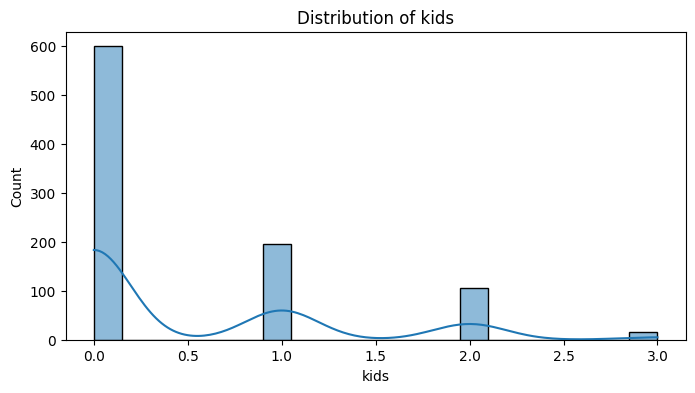

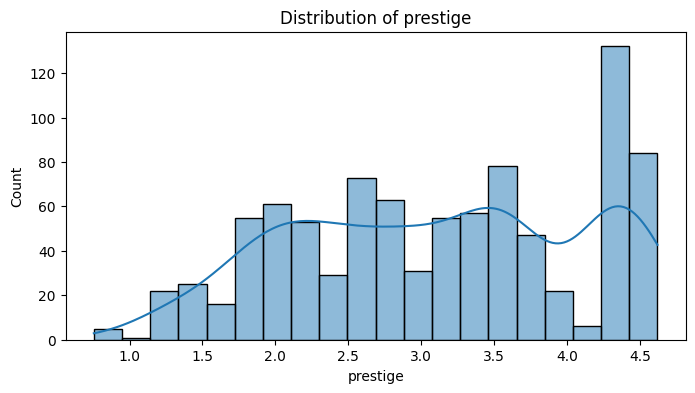

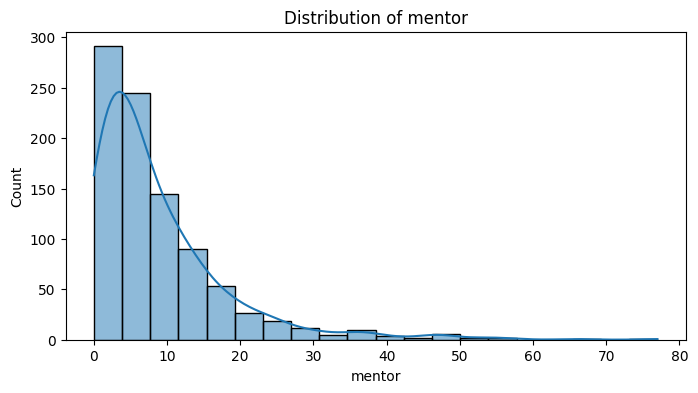

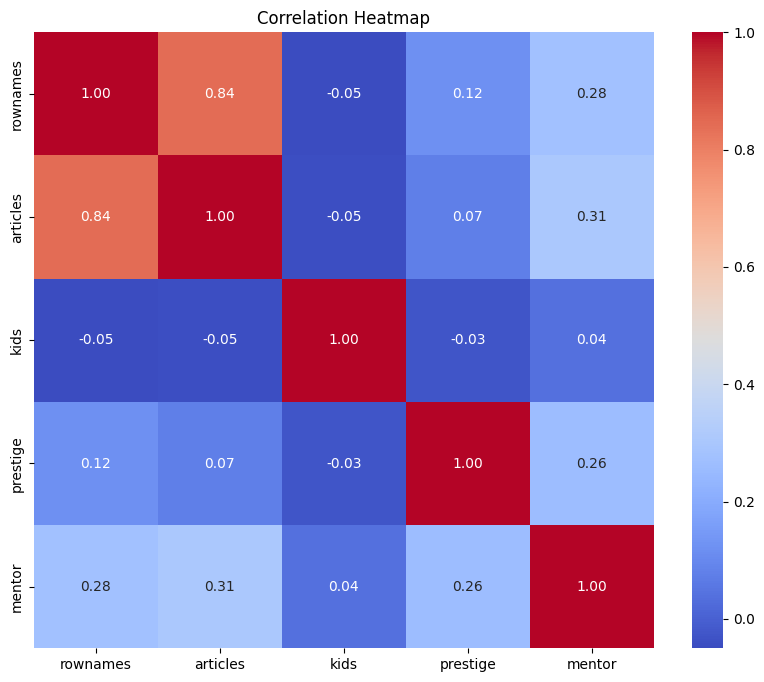

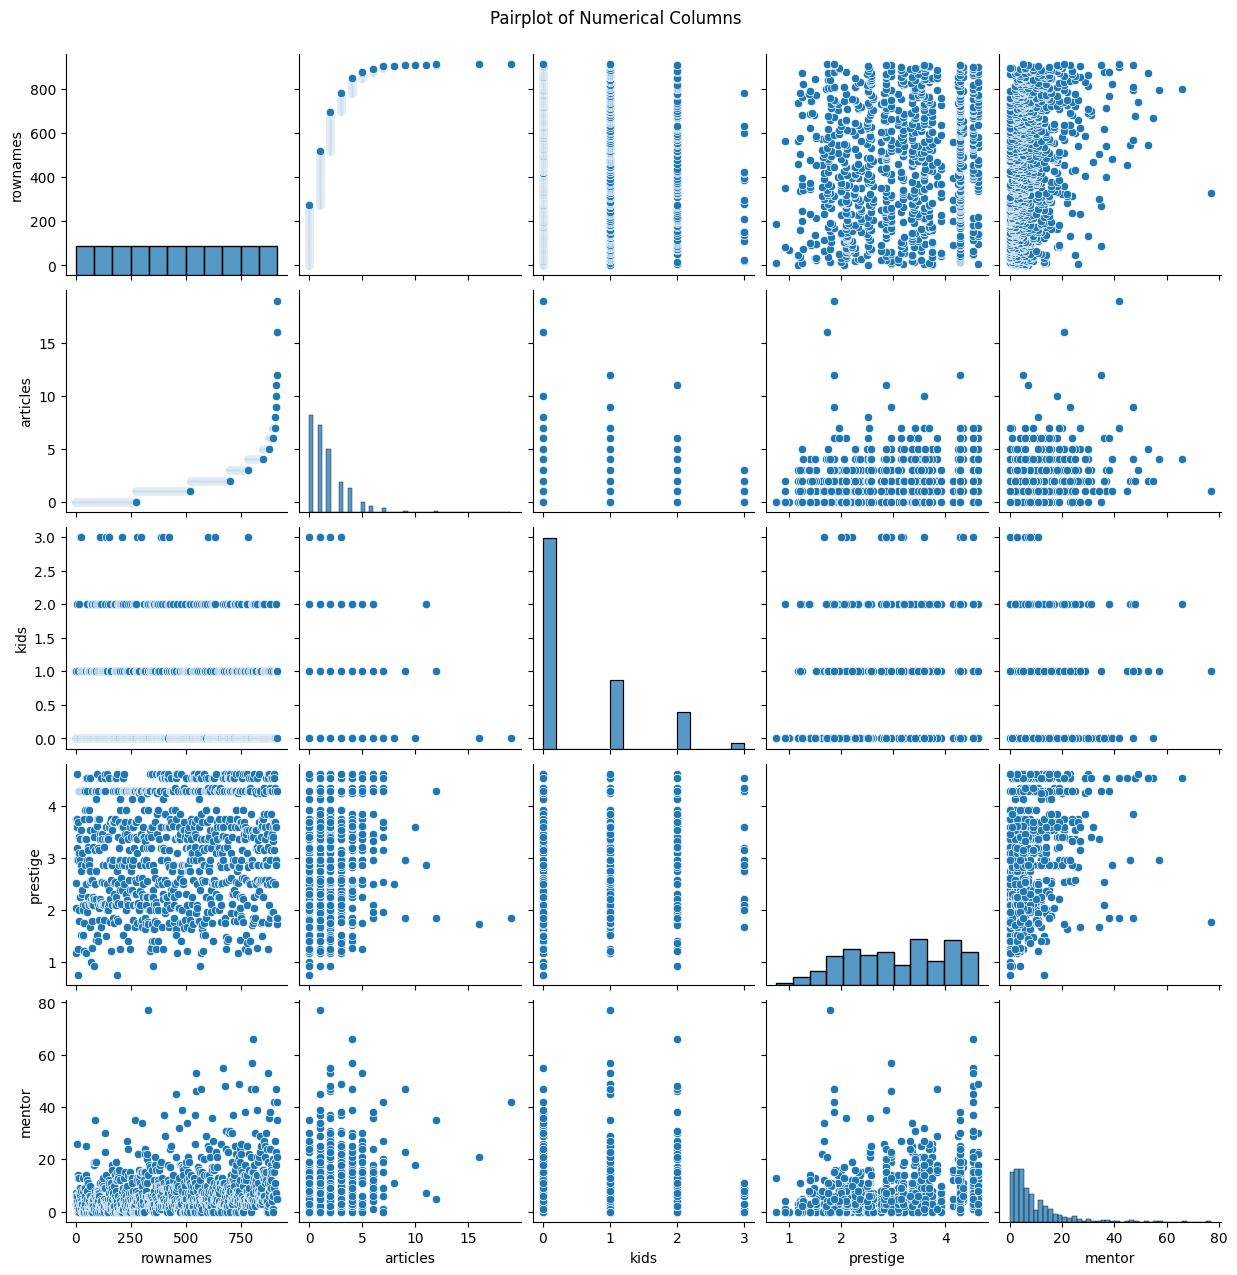

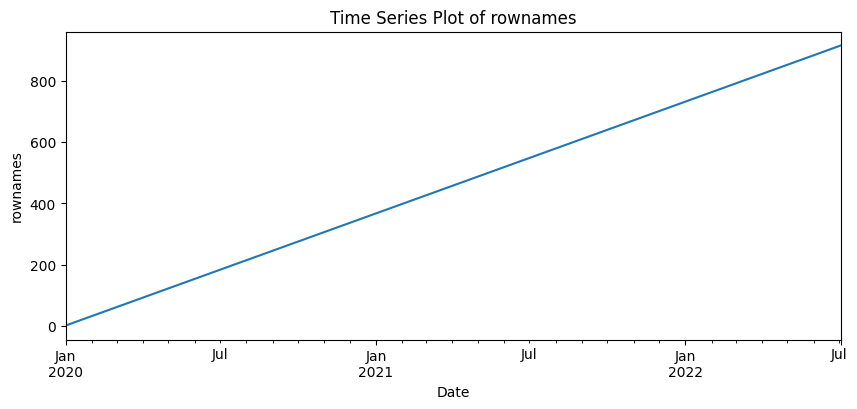

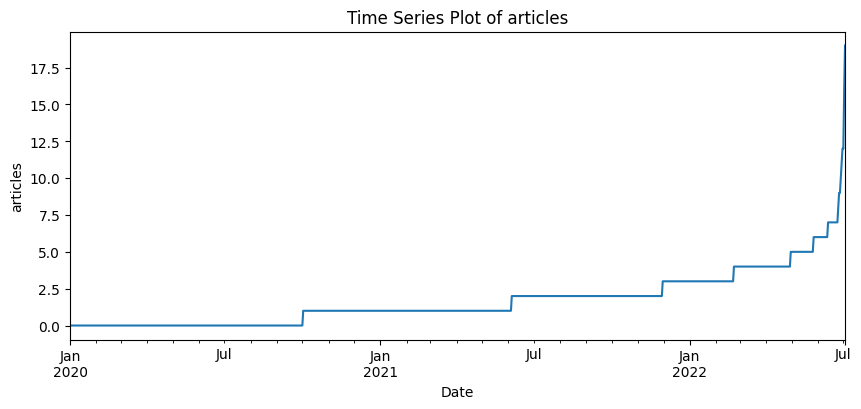

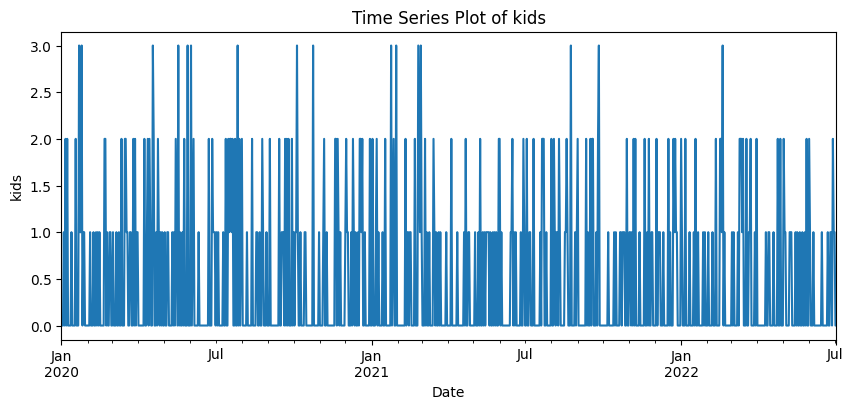

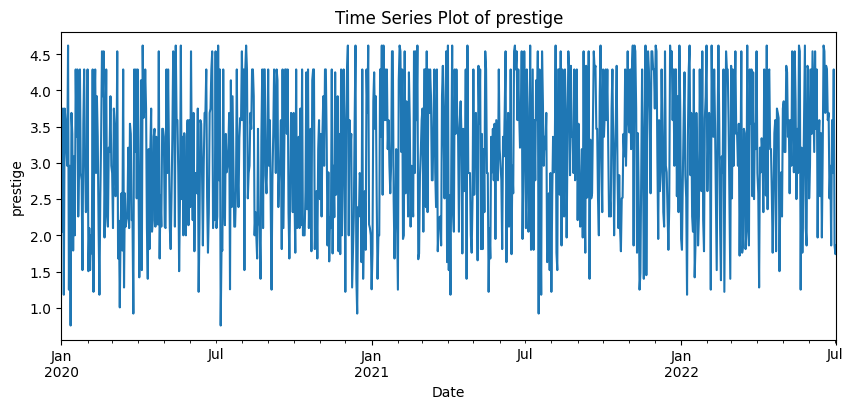

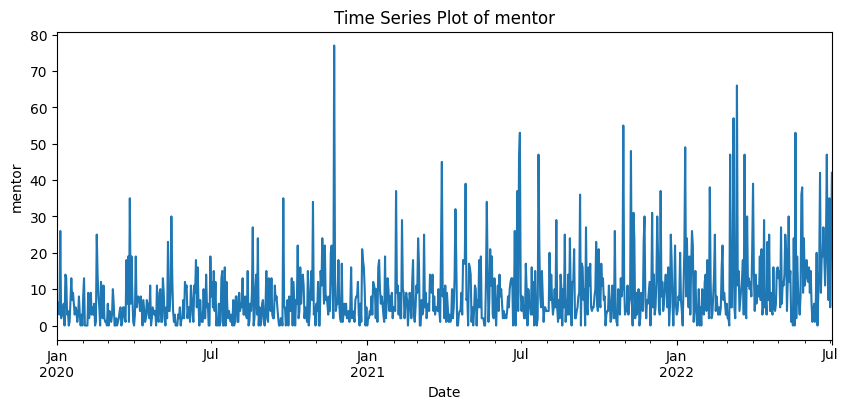


Resampling Time Series Data (Monthly Means):
            rownames  articles      kids  prestige    mentor
Date                                                        
2020-01-31      16.0       0.0  0.580645  2.927903  5.483871
2020-02-29      46.0       0.0  0.413793  2.959828  5.275862
2020-03-31      76.0       0.0  0.612903  2.720161  5.580645
2020-04-30     106.5       0.0  0.633333  2.885667  4.700000
2020-05-31     137.0       0.0  0.580645  3.042097  5.774194


<ipython-input-11-ab0e8c776ffd>:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resampled = data[numerical_columns].resample('M').mean()


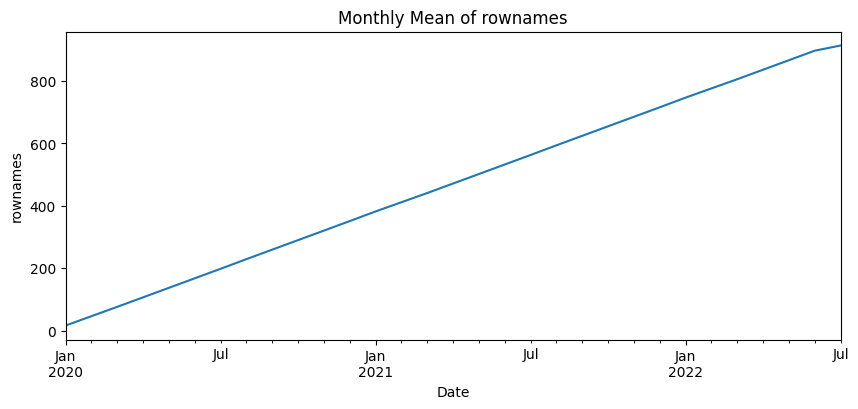

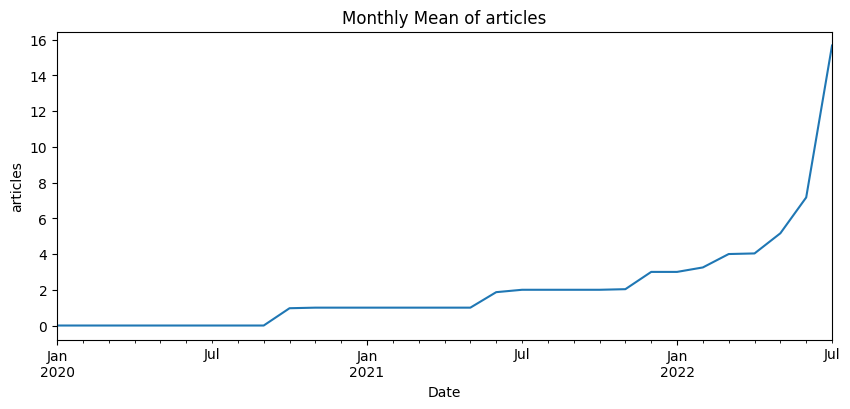

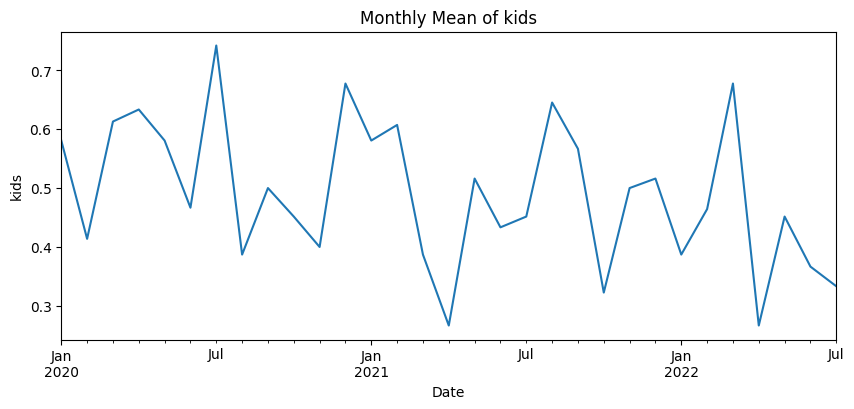

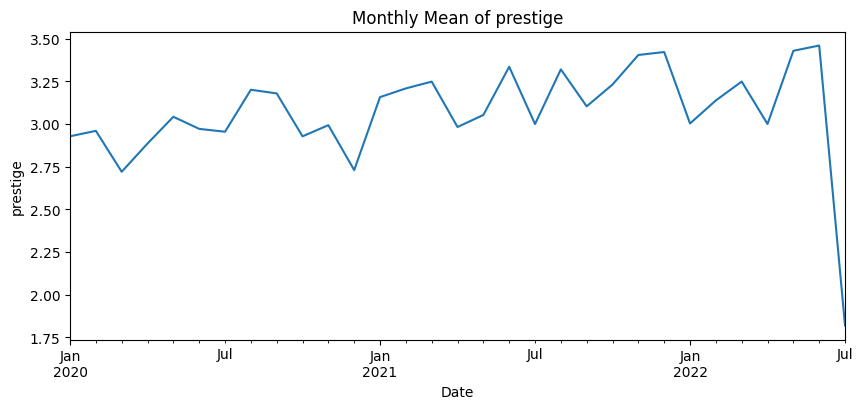

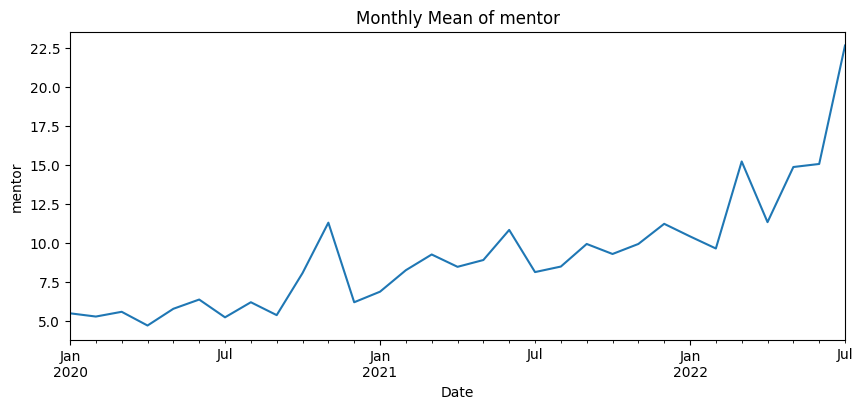

In [11]:
# MODULE 3

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/mnt/data/PhDPublications.csv'
data = pd.read_csv('PhDPublications.csv')

# Correlation Analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Univariate Analysis
print("\nUnivariate Analysis - Summary Statistics:")
for col in numerical_columns:
    print(f"\nColumn: {col}")
    print(data[col].describe())

# Visualize distributions
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

# Bivariate Analysis - Correlation Heatmap
if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = data[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()

# Multivariate Analysis - Pairplot
if len(numerical_columns) > 1:
    sns.pairplot(data[numerical_columns])
    plt.suptitle("Pairplot of Numerical Columns", y=1.02)
    plt.show()

# Time Series Analysis
# Ensure the dataset has a time column or generate a dummy one for demonstration
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])  # Convert to datetime if not already
else:
    # Creating a sample datetime index for demonstration
    data['Date'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')

data.set_index('Date', inplace=True)

# Visualizing time series data
if not numerical_columns.empty:
    for col in numerical_columns:
        plt.figure(figsize=(10, 4))
        data[col].plot(title=f"Time Series Plot of {col}")
        plt.ylabel(col)
        plt.xlabel('Date')
        plt.show()

# Resampling time series data
print("\nResampling Time Series Data (Monthly Means):")
if not numerical_columns.empty:
    monthly_resampled = data[numerical_columns].resample('M').mean()
    print(monthly_resampled.head())

    # Visualize resampled data
    for col in numerical_columns:
        plt.figure(figsize=(10, 4))
        monthly_resampled[col].plot(title=f"Monthly Mean of {col}")
        plt.ylabel(col)
        plt.xlabel('Date')
        plt.show()



1-D Statistical Summary:

Column: rownames
count    915.000000
mean     458.000000
std      264.282046
min        1.000000
25%      229.500000
50%      458.000000
75%      686.500000
max      915.000000
Name: rownames, dtype: float64

Column: articles
count    915.000000
mean       1.692896
std        1.926069
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       19.000000
Name: articles, dtype: float64

Column: kids
count    915.000000
mean       0.495082
std        0.764880
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: kids, dtype: float64

Column: prestige
count    915.000000
mean       3.103109
std        0.984249
min        0.755000
25%        2.260000
50%        3.150000
75%        3.920000
max        4.620000
Name: prestige, dtype: float64

Column: mentor
count    915.000000
mean       8.767213
std        9.483916
min        0.000000
25%        3.000000
50%        6.000000
75%       

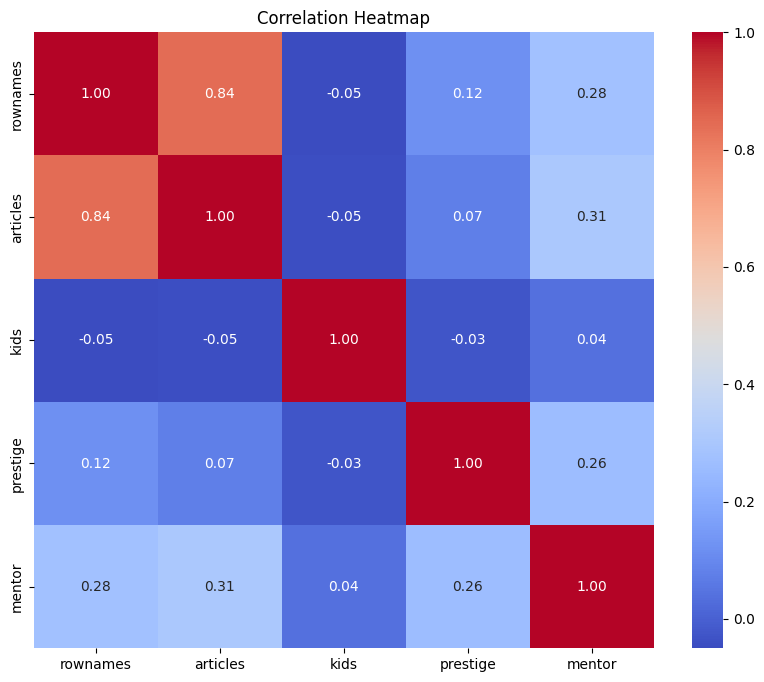

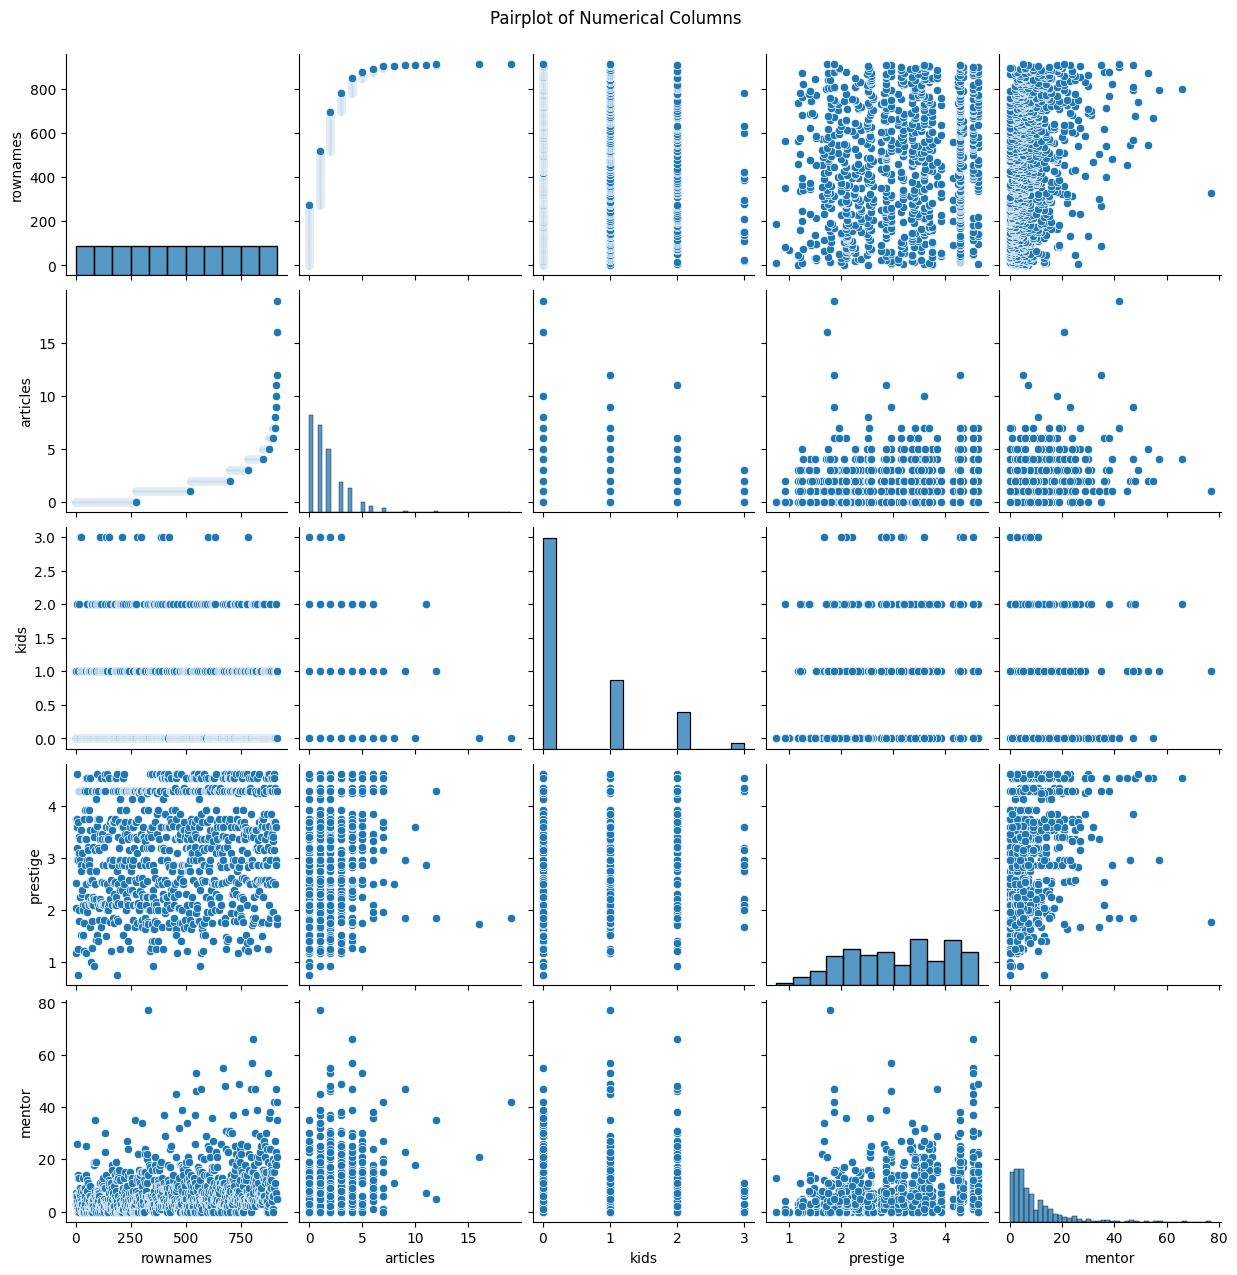

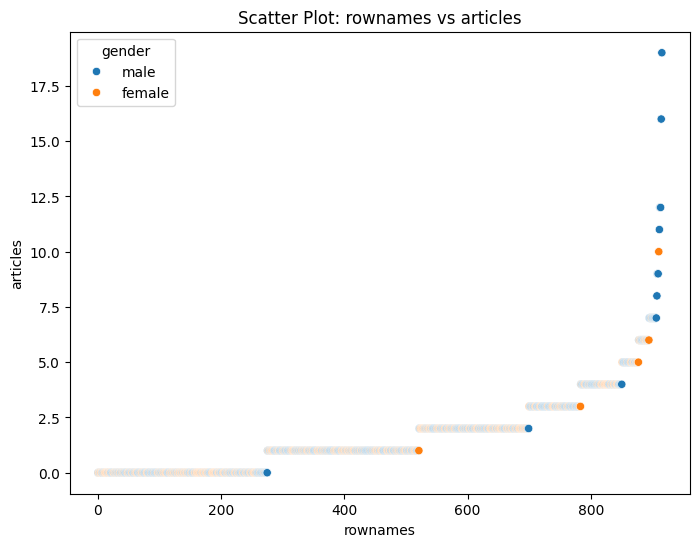

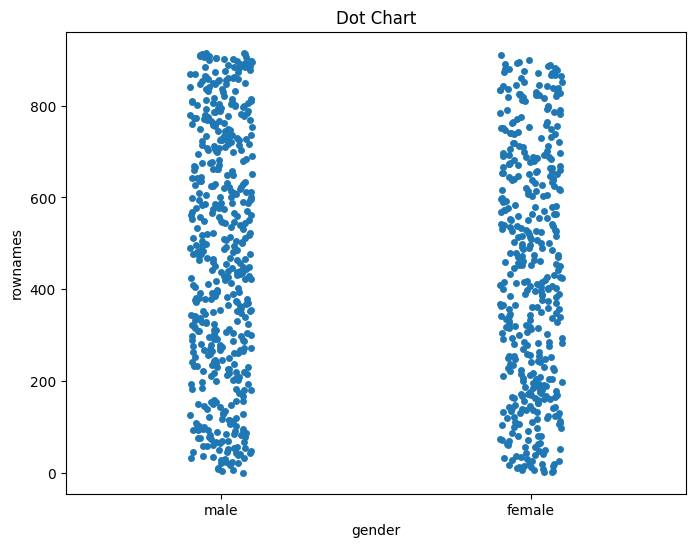

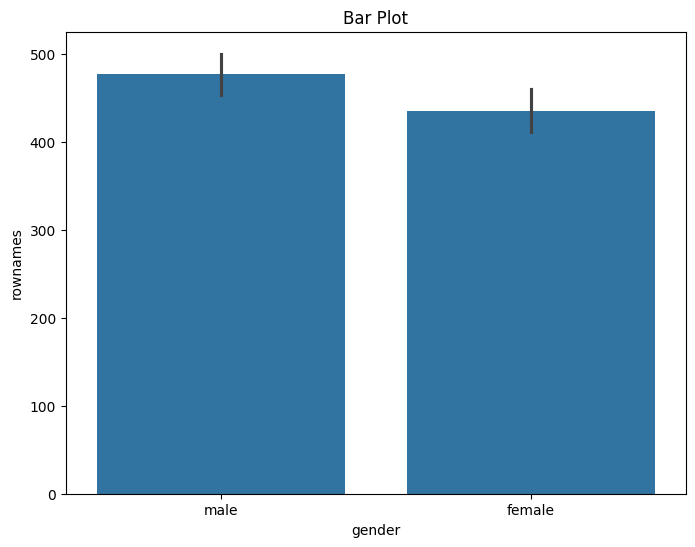

In [12]:
# MODULE 4

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/mnt/data/PhDPublications.csv'
data = pd.read_csv('PhDPublications.csv')

# Numerical and Categorical Columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# 1-D Statistical Summary
print("\n1-D Statistical Summary:")
for col in numerical_columns:
    print(f"\nColumn: {col}")
    print(data[col].describe())

# 2-D Statistical Summary (Correlation between numerical columns)
if len(numerical_columns) > 1:
    print("\n2-D Statistical Summary (Correlation Matrix):")
    correlation_matrix = data[numerical_columns].corr()
    print(correlation_matrix)

# Visualization of Correlation (Heatmap)
if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()

# N-D Statistical Analysis (Pairplot for numerical columns)
if len(numerical_columns) > 1:
    sns.pairplot(data[numerical_columns])
    plt.suptitle("Pairplot of Numerical Columns", y=1.02)
    plt.show()

# Visualization
# Scatter Plot
if len(numerical_columns) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=numerical_columns[0], y=numerical_columns[1], hue=categorical_columns[0] if len(categorical_columns) > 0 else None)
    plt.title(f"Scatter Plot: {numerical_columns[0]} vs {numerical_columns[1]}")
    plt.show()

# Dot Chart
if not numerical_columns.empty:
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=data, x=categorical_columns[0] if len(categorical_columns) > 0 else None, y=numerical_columns[0], jitter=True)
    plt.title("Dot Chart")
    plt.show()

# Bar Plot
if not numerical_columns.empty:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=data, x=categorical_columns[0] if len(categorical_columns) > 0 else None, y=numerical_columns[0])
    plt.title("Bar Plot")
    plt.show()


Cleaning data...
Data cleaning completed!

Module 5: Clustering Algorithms

Performing Spectral Clustering...
Spectral Clustering Labels:
[2 2 2 1 2 1 2 1 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 2
 2 1 2 2 1 2 1 2 1 2 2 2 2 2 1 1 2 1 2 2 1 1 2 2 1 2 2 2 1 2 2 1 2 2 1 2 2
 2 1 1 1 1 2 2 1 1 2 2 1 0 1 2 1 1 2 2 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 1 1 2
 2 1 2 1 1 2 1 2 1 2 2 1 2 2 1 1 2 2 2 2 1 2 1 2 1 1 2 1 2 1 2 2 1 2 1 2 2
 2 1 2 2 2 1 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 2 1 2
 1 2 2 2 2 2 1 2 2 1 2 2 1 1 1 1 1 1 2 2 1 2 2 1 2 1 2 1 1 2 2 2 2 2 1 2 2
 2 2 2 1 2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2
 2 1 1 1 2 1 2 1 0 1 2 2 2 1 2 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 

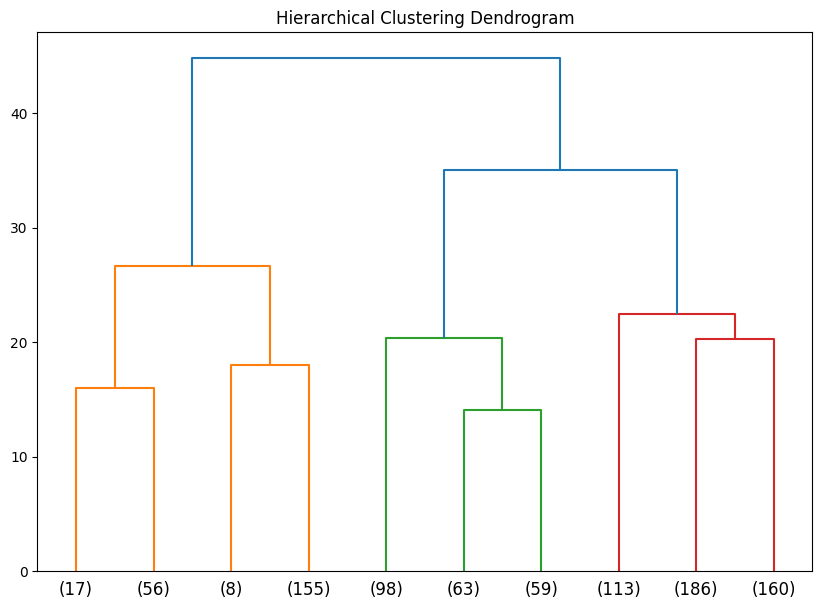


Visualizing KMeans Clustering...


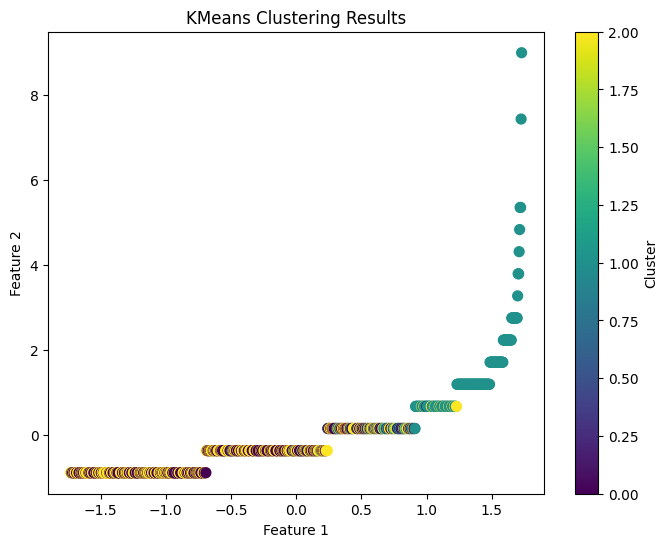

In [15]:
#MODULE 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/mnt/data/PhDPublications.csv'
data = pd.read_csv('PhDPublications.csv')

# Step 1: Data Cleaning
print("Cleaning data...")

# Remove duplicate rows (if any)
data = data.drop_duplicates()

# Handle missing values
# Replace numerical missing values with the mean of the respective column
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].apply(lambda col: col.fillna(col.mean()))

# Replace missing values in categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Normalize numerical data for better clustering
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

print("Data cleaning completed!")

# Step 2: Clustering Algorithms
print("\nModule 5: Clustering Algorithms")

if len(numerical_columns) > 1:
    clustering_data = data[numerical_columns]

    # 1. Spectral Clustering
    print("\nPerforming Spectral Clustering...")
    spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(clustering_data)
    print("Spectral Clustering Labels:")
    print(spectral_labels)

    # 2. Document Clustering (Using KMeans)
    print("\nPerforming Document Clustering (KMeans)...")
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(clustering_data)
    print("KMeans Clustering Labels:")
    print(kmeans_labels)

    # 3. Minimum Spanning Tree Clustering
    print("\nComputing Minimum Spanning Tree (MST)...")
    # Compute the pairwise distance matrix
    distance_matrix = squareform(pdist(clustering_data, metric='euclidean'))

    # Compute the Minimum Spanning Tree (MST)
    mst_matrix = minimum_spanning_tree(distance_matrix).toarray()
    print("Minimum Spanning Tree Matrix:")
    print(mst_matrix)

    # 4. Model-Based Clustering
    print("\nPerforming Model-Based Clustering (EM Algorithm)...")
    gmm = GaussianMixture(n_components=3, random_state=42)
    gmm_labels = gmm.fit_predict(clustering_data)
    print("Gaussian Mixture Model Clustering Labels:")
    print(gmm_labels)

    # 5. Hierarchical Agglomerative Clustering
    print("\nPerforming Hierarchical Agglomerative Clustering...")
    hac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
    hac_labels = hac.fit_predict(clustering_data)
    print("Hierarchical Agglomerative Clustering Labels:")
    print(hac_labels)

    # Generate Dendrogram for Hierarchical Clustering
    print("\nGenerating Dendrogram...")
    plt.figure(figsize=(10, 7))
    linked = linkage(clustering_data, method='ward')
    dendrogram(linked, truncate_mode='lastp', p=10)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.show()

    # 6. Visualization: Example with KMeans
    print("\nVisualizing KMeans Clustering...")
    if clustering_data.shape[1] >= 2:  # Ensure at least 2 numerical columns
        plt.figure(figsize=(8, 6))
        plt.scatter(clustering_data.iloc[:, 0], clustering_data.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=50)
        plt.title("KMeans Clustering Results")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.colorbar(label="Cluster")
        plt.show()

else:
    print("Not enough numerical data for clustering.")


Cleaning data...
Data cleaning completed!

Module 6: Dimensionality Reduction

Performing Principal Component Analysis (PCA)...
PCA Components:
[[-1.81365176e+00 -3.73254988e-03]
 [-1.95498370e+00 -4.10493513e-01]
 [-1.58438578e+00  8.70050349e-01]
 ...
 [ 4.00258489e+00 -2.90256396e+00]
 [ 6.02282054e+00 -3.08890568e+00]
 [ 7.91419002e+00 -2.35377723e+00]]


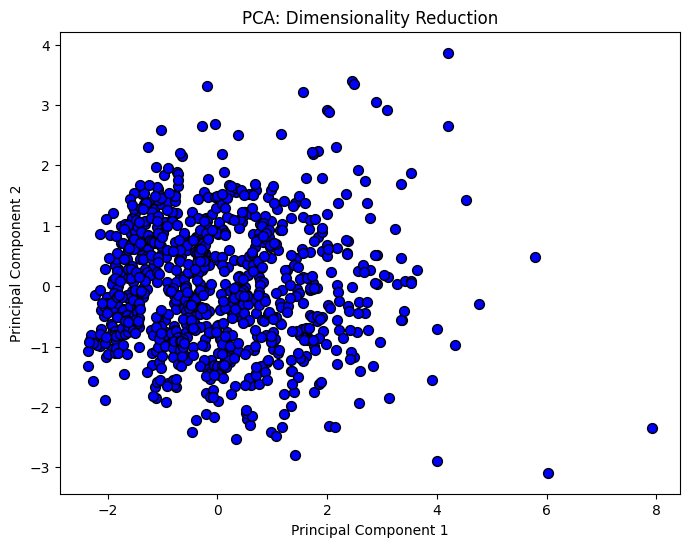


Performing Multidimensional Scaling (MDS)...
MDS Result:
[[-1.837403    1.06863261]
 [-2.24465168  0.80961302]
 [-0.77451783  1.75845224]
 ...
 [ 1.01161893 -5.83604787]
 [ 2.62235899 -7.53601451]
 [ 6.87099672 -7.24643762]]


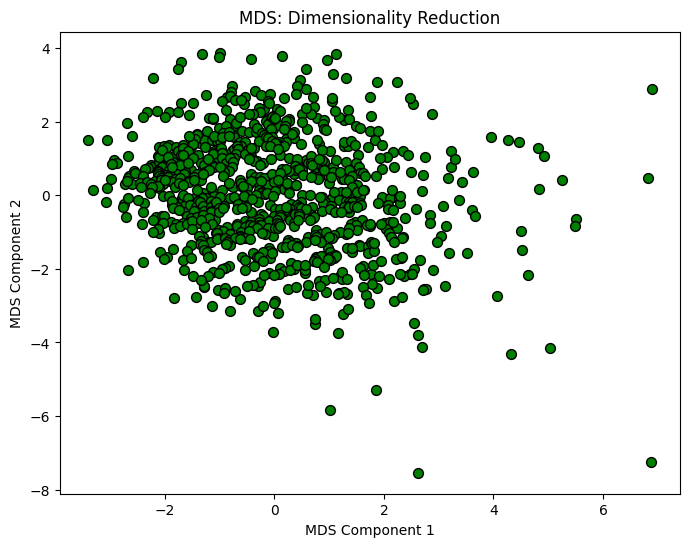


Performing Manifold Learning (Isomap)...
Isomap Result:
[[-4.34850535 -2.7759367 ]
 [-4.09969255 -2.92807712]
 [-5.09270653 -1.15900472]
 ...
 [ 3.9857173   4.34663577]
 [ 3.56957846  5.9579639 ]
 [ 3.16946453  8.14164714]]


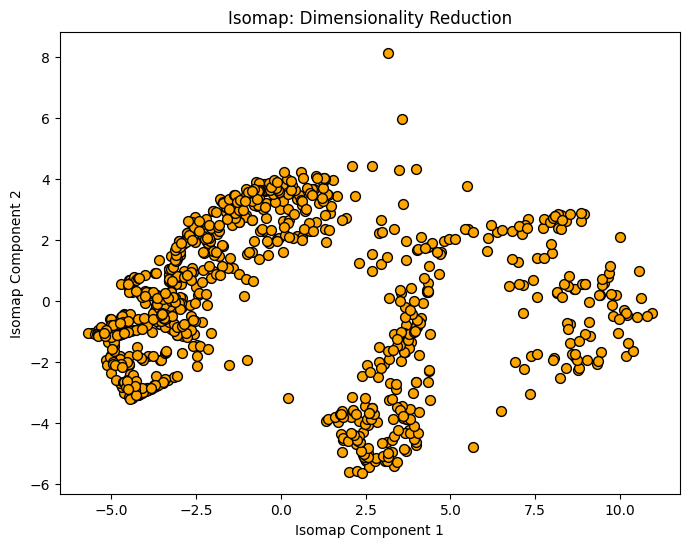


Performing Self-Organizing Maps (Using t-SNE as a non-linear method)...
t-SNE Result:
[[-31.108856   -15.034352  ]
 [-32.433975   -16.322664  ]
 [-28.336037     0.5997744 ]
 ...
 [ 24.845268    -2.1273696 ]
 [ 24.088762    -0.84213847]
 [ 24.003077    -0.6178084 ]]


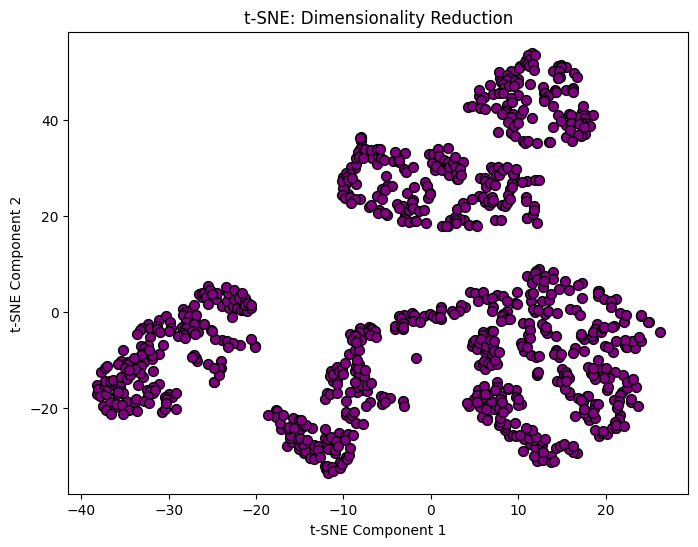

In [17]:
#MODULE 6

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.preprocessing import StandardScaler

# Step 1: Data Cleaning
print("Cleaning data...")

# Load the dataset
file_path = '/mnt/data/PhDPublications.csv'
data = pd.read_csv('PhDPublications.csv')

# Remove duplicate rows (if any)
data = data.drop_duplicates()

# Handle missing values
# Replace numerical missing values with the mean of the respective column
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].apply(lambda col: col.fillna(col.mean()))

# Replace missing values in categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Normalize numerical data for dimensionality reduction
data[numerical_columns] = StandardScaler().fit_transform(data[numerical_columns])

print("Data cleaning completed!")

# Step 2: Dimensionality Reduction
print("\nModule 6: Dimensionality Reduction")

if len(numerical_columns) > 1:
    dimensionality_data = data[numerical_columns]

    # 1. Principal Component Analysis (PCA)
    print("\nPerforming Principal Component Analysis (PCA)...")
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(dimensionality_data)
    print("PCA Components:")
    print(pca_result)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)
    plt.title("PCA: Dimensionality Reduction")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    # 2. Multidimensional Scaling (MDS)
    print("\nPerforming Multidimensional Scaling (MDS)...")
    mds = MDS(n_components=2, random_state=42)
    mds_result = mds.fit_transform(dimensionality_data)
    print("MDS Result:")
    print(mds_result)

    plt.figure(figsize=(8, 6))
    plt.scatter(mds_result[:, 0], mds_result[:, 1], c='green', edgecolor='k', s=50)
    plt.title("MDS: Dimensionality Reduction")
    plt.xlabel("MDS Component 1")
    plt.ylabel("MDS Component 2")
    plt.show()

    # 3. Manifold Learning (Isomap)
    print("\nPerforming Manifold Learning (Isomap)...")
    isomap = Isomap(n_components=2)
    isomap_result = isomap.fit_transform(dimensionality_data)
    print("Isomap Result:")
    print(isomap_result)

    plt.figure(figsize=(8, 6))
    plt.scatter(isomap_result[:, 0], isomap_result[:, 1], c='orange', edgecolor='k', s=50)
    plt.title("Isomap: Dimensionality Reduction")
    plt.xlabel("Isomap Component 1")
    plt.ylabel("Isomap Component 2")
    plt.show()

    # 4. Self-Organizing Maps (t-SNE as an example)
    print("\nPerforming Self-Organizing Maps (Using t-SNE as a non-linear method)...")
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(dimensionality_data)
    print("t-SNE Result:")
    print(tsne_result)

    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='purple', edgecolor='k', s=50)
    plt.title("t-SNE: Dimensionality Reduction")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

else:
    print("Not enough numerical data for dimensionality reduction.")


Cleaning data...
Data cleaning completed!

Encoding categorical variables...

Module 7: Model Development and Evaluation

Constructing Linear Regression Model...

Evaluating the Model...
Mean Squared Error (MSE): 0.9276235479081619
R-squared (R2): 0.027007284408494647


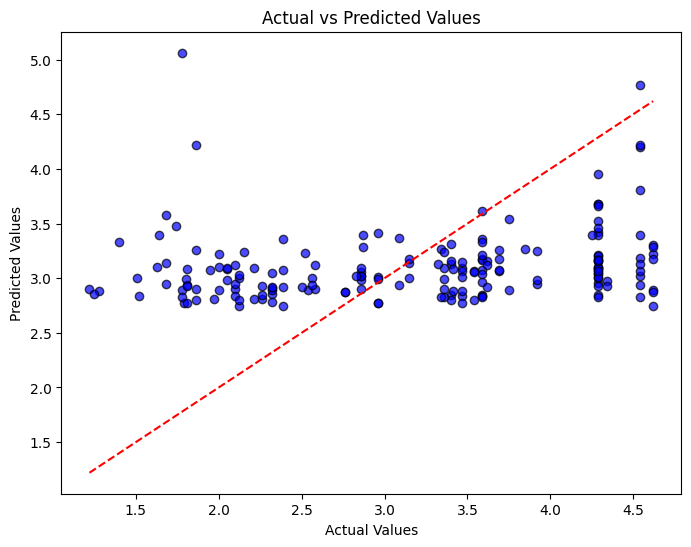


Understanding Reinforcement Learning:
Reinforcement Learning (RL) is a type of machine learning where an agent learns by interacting with the environment to achieve a goal.
Difference between Supervised Learning and Reinforcement Learning:
- Supervised Learning uses labeled data to train models.
- Reinforcement Learning involves learning through rewards and penalties based on actions.
Applications of Reinforcement Learning include robotics, gaming, and autonomous vehicles.


In [20]:
#MODULE 7

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data Cleaning
print("Cleaning data...")

# Load the dataset
file_path = '/mnt/data/PhDPublications.csv'
data = pd.read_csv('PhDPublications.csv')

# Remove duplicate rows (if any)
data = data.drop_duplicates()

# Handle missing values
# Replace numerical missing values with the mean of the respective column
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].apply(lambda col: col.fillna(col.mean()))

# Replace missing values in categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

print("Data cleaning completed!")

# Step 2: Handle Categorical Data (One-Hot Encoding)
print("\nEncoding categorical variables...")

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Step 3: Model Development and Evaluation
print("\nModule 7: Model Development and Evaluation")

# Set 'prestige' as the target column
target_column = 'prestige'

if target_column in data_encoded.columns:
    # Features are all columns except the target
    X = data_encoded.drop(columns=[target_column, 'rownames'])  # Exclude 'rownames' as it's just an identifier
    y = data_encoded[target_column]  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build a Linear Regression Model
    print("\nConstructing Linear Regression Model...")
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("\nEvaluating the Model...")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

    # Visualize actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolor='k', color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title("Actual vs Predicted Values")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # Understanding Reinforcement Learning (Simple Description)
    print("\nUnderstanding Reinforcement Learning:")
    print("Reinforcement Learning (RL) is a type of machine learning where an agent learns by interacting with the environment to achieve a goal.")
    print("Difference between Supervised Learning and Reinforcement Learning:")
    print("- Supervised Learning uses labeled data to train models.")
    print("- Reinforcement Learning involves learning through rewards and penalties based on actions.")
    print("Applications of Reinforcement Learning include robotics, gaming, and autonomous vehicles.")
else:
    print("Target column not found in the dataset. Please specify the correct column name.")
